In [1]:
from google.colab import files
uploaded=files.upload()

Saving data-export (1).csv to data-export (1).csv


In [2]:
import pandas as pd

data = pd.read_csv("/content/data-export (1).csv")
data



,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
...,...,...,...,...,...,...,...,...,...,...
3178,Unassigned,2024042806,0,1,0,0,0,2,0,2
3179,Unassigned,2024043005,0,1,0,0,0,2,0,2
3180,Unassigned,2024043006,0,1,0,0,0,2,0,2
3181,Unassigned,2024050105,0,1,0,0,0,2,0,2


## There are some errors in the first row of the dataset, which usually occurs while collecting the data from websites. The data starts from the second row

In [3]:
new_header = data.iloc[0]  # # Extract the first row
data = data[1:]  # Keep only the remaining rows  remove the first row
data.columns = new_header  # set the header row as the df header
data.reset_index(drop=True, inplace=True) ##  # Drop the old index and reassign numbers

print(data.head())

0 Session primary channel group (Default channel group)  \
0                                             Direct      
1                                     Organic Social      
2                                             Direct      
3                                     Organic Social      
4                                     Organic Social      

0 Date + hour (YYYYMMDDHH) Users Sessions Engaged sessions  \
0               2024041623   237      300              144   
1               2024041719   208      267              132   
2               2024041723   188      233              115   
3               2024041718   187      256              125   
4               2024041720   175      221              112   

0 Average engagement time per session Engaged sessions per user  \
0                  47.526666666666700        0.6075949367088610   
1                   32.09737827715360        0.6346153846153850   
2                   39.93991416309010        0.6117021276595740   
3   

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

In [5]:
data.columns

Index(['Session primary channel group (Default channel group)',
       'Date + hour (YYYYMMDDHH)', 'Users', 'Sessions', 'Engaged sessions',
       'Average engagement time per session', 'Engaged sessions per user',
       'Events per session', 'Engagement rate', 'Event count'],
      dtype='object', name=0)

In [6]:
data.isnull().sum()

,0
0,
Session primary channel group (Default channel group),0
Date + hour (YYYYMMDDHH),0
Users,0
Sessions,0
Engaged sessions,0
Average engagement time per session,0
Engaged sessions per user,0
Events per session,0
Engagement rate,0


In [7]:
print(data.describe())

0      Session primary channel group (Default channel group)  \
count                                                3182      
unique                                                  7      
top                                                Direct      
freq                                                  672      

0      Date + hour (YYYYMMDDHH) Users Sessions Engaged sessions  \
count                      3182  3182     3182             3182   
unique                      672   147      180              103   
top                  2024042417     1        1                0   
freq                          6   335      340              393   

0      Average engagement time per session Engaged sessions per user  \
count                                 3182                      3182   
unique                                2823                       808   
top                                      0                         0   
freq                                   170             

In [8]:
## Convert datetime ,users, and session to numerical format for further analysis

# Convert the date column to datetime format
data.loc[:, 'Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')

# Convert Users and Sessions to numeric
data.loc[:, 'Users'] = pd.to_numeric(data['Users'])
data.loc[:, 'Sessions'] = pd.to_numeric(data['Sessions'])

# Group data by date and sum up the users and sessions
grouped_data = data.groupby('Date + hour (YYYYMMDDHH)').agg({'Users': 'sum', 'Sessions': 'sum'})

# Display the first few rows of grouped data
print(grouped_data.head())

0                        Users Sessions
Date + hour (YYYYMMDDHH)               
2024-04-06 00:00:00        197      270
2024-04-06 01:00:00        107      142
2024-04-06 02:00:00        115      142
2024-04-06 03:00:00         93      122
2024-04-06 04:00:00         79      102


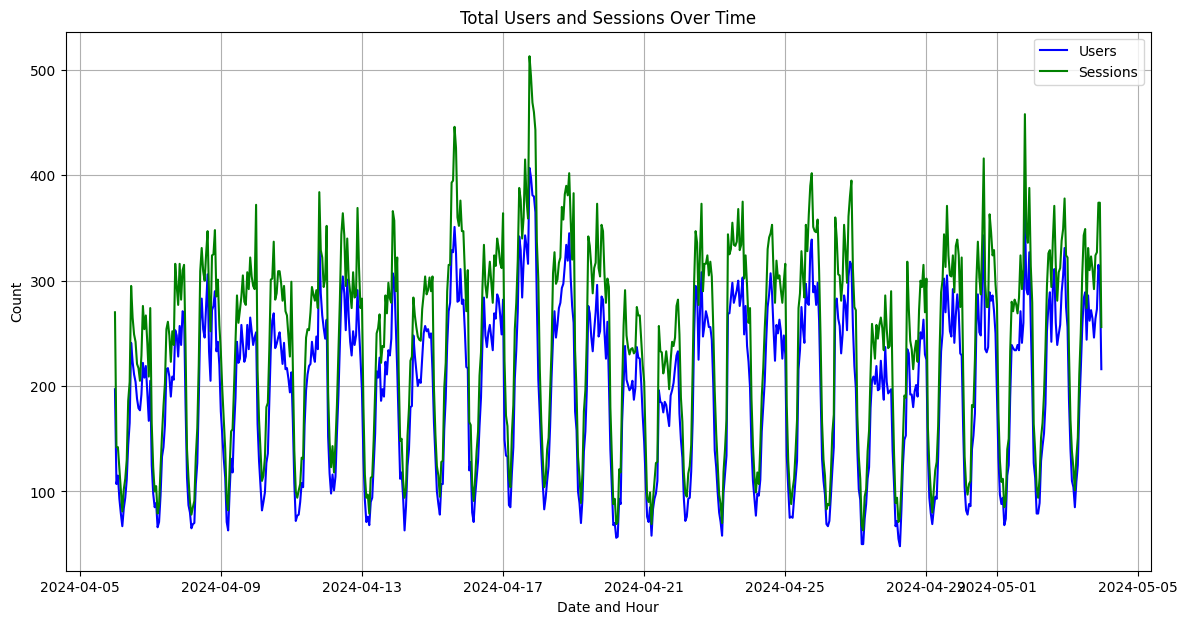

In [9]:
## analyze the total users and sessions over time
import matplotlib.pyplot as plt

# plotting the aggregated users and sessions over time
plt.figure(figsize=(14, 7))
plt.plot(grouped_data.index, grouped_data['Users'], label='Users', color='blue')
plt.plot(grouped_data.index, grouped_data['Sessions'], label='Sessions', color='green')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
## Analyze User Engagement Analysis
import plotly.express as px

# Ensure 'data' is a copy to avoid SettingWithCopyWarning
data = data.copy()

# Convert relevant columns to numeric
data.loc[:, 'Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data.loc[:, 'Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data.loc[:, 'Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data.loc[:, 'Events per session'] = pd.to_numeric(data['Events per session'])
data.loc[:, 'Engagement rate'] = pd.to_numeric(data['Engagement rate'])

# Group data by date and calculate mean for engagement metrics
engagement_metrics = data.groupby('Date + hour (YYYYMMDDHH)').agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
}).reset_index()

# Plot 1: Average Engagement Time per Session
fig1 = px.line(engagement_metrics, x='Date + hour (YYYYMMDDHH)', y='Average engagement time per session',
               title=" Average Engagement Time per Session", markers=True, template="plotly_dark")

# Plot 2: Engaged Sessions per User
fig2 = px.line(engagement_metrics, x='Date + hour (YYYYMMDDHH)', y='Engaged sessions per user',
               title=" Engaged Sessions per User", markers=True, template="plotly_dark")

# Plot 3: Events per Session
fig3 = px.line(engagement_metrics, x='Date + hour (YYYYMMDDHH)', y='Events per session',
               title=" Events per Session", markers=True, template="plotly_dark")

# Plot 4: Engagement Rate
fig4 = px.line(engagement_metrics, x='Date + hour (YYYYMMDDHH)', y='Engagement rate',
               title=" Engagement Rate", markers=True, template="plotly_dark")

# Show all plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()




In [11]:
## analyze the correlations between different website engagement metrics
import plotly.subplots as sp

# Creating subplots for interactive scatter plots
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=[
    "Avg Engagement Time vs Events/Session",
    "Avg Engagement Time vs Engagement Rate",
    "Engaged Sessions/User vs Events/Session",
    "Engaged Sessions/User vs Engagement Rate"
])

# Plot 1: Average Engagement Time vs Events per Session
fig.add_trace(px.scatter(data,
                         x="Average engagement time per session",
                         y="Events per session",
                         color_discrete_sequence=["blue"]).data[0], row=1, col=1)

# Plot 2: Average Engagement Time vs Engagement Rate
fig.add_trace(px.scatter(data,
                         x="Average engagement time per session",
                         y="Engagement rate",
                         color_discrete_sequence=["red"]).data[0], row=1, col=2)

# Plot 3: Engaged Sessions per User vs Events per Session
fig.add_trace(px.scatter(data,
                         x="Engaged sessions per user",
                         y="Events per session",
                         color_discrete_sequence=["green"]).data[0], row=2, col=1)

# Plot 4: Engaged Sessions per User vs Engagement Rate
fig.add_trace(px.scatter(data,
                         x="Engaged sessions per user",
                         y="Engagement rate",
                         color_discrete_sequence=["purple"]).data[0], row=2, col=2)

# Update layout
fig.update_layout(
    height=800, width=1000, title_text="Correlation Analysis of Engagement Metrics",
    showlegend=False
)

fig.show()


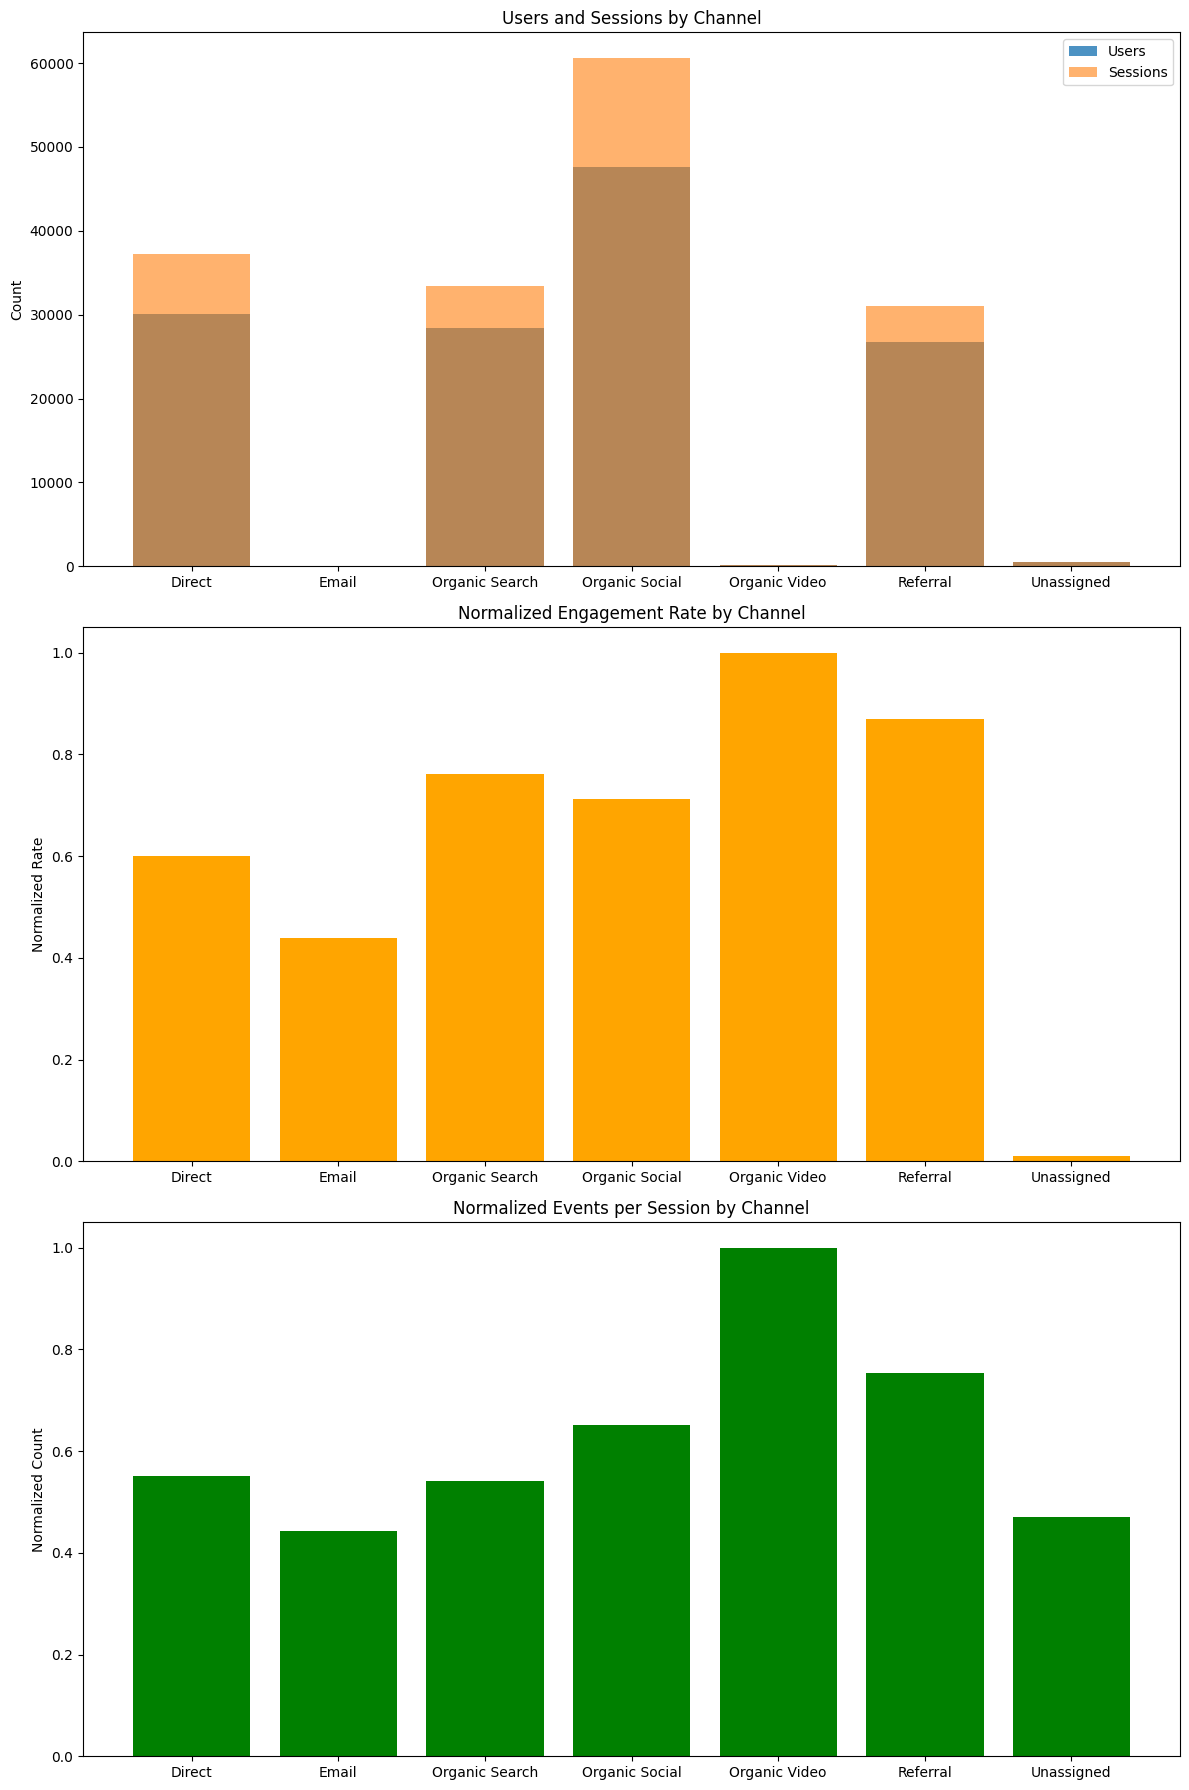

In [12]:
## Analyze the  Channel Performance
# group data by channel and aggregate necessary metrics
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

## Forecasting Website Traffic

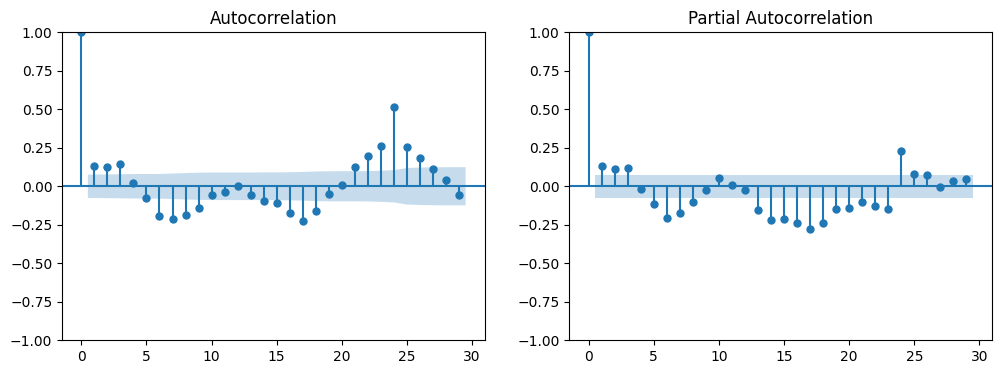

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Ensure the 'Sessions' column is converted to numeric dtype
time_series_data = grouped_data['Sessions'].infer_objects(copy=False).asfreq('h').ffill()

seasonal_period = 24

# Differencing the series to make it stationary
differenced_series = time_series_data.diff().dropna()

# Plot ACF and PACF of time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()


In [19]:
import plotly.graph_objects as go
from statsmodels.tsa.statespace.sarimax import SARIMAX ## time-series forecasting with SARIMA (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors)

# Suppress FutureWarning by opting into the future behavior
pd.set_option('future.no_silent_downcasting', True)

# 'Sessions' column has a DateTimeIndex and fix deprecated usage
time_series_data = grouped_data['Sessions'].asfreq('h').ffill().infer_objects(copy=False)

seasonal_period = 24

# Define and fit the SARIMA model
sarima_model = SARIMAX(time_series_data,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()

# Forecast the next 24 hours
sarima_forecast = sarima_model_fit.forecast(steps=24)
forecast_index = pd.date_range(time_series_data.index[-1], periods=25, freq='h')[1:]

# Create an interactive plot using Plotly
fig = go.Figure()

# Add actual session data
fig.add_trace(go.Scatter(
    x=time_series_data.index[-168:],
    y=time_series_data[-168:],
    mode='lines',
    name='Actual Sessions',
    line=dict(color='blue')
))

# Add forecasted session data
fig.add_trace(go.Scatter(
    x=forecast_index,
    y=sarima_forecast,
    mode='lines',
    name='Forecasted Sessions',
    line=dict(color='red', dash='dash')
))

# Customize layout
fig.update_layout(
    title='Website Traffic Forecasting with SARIMA (Sessions)',
    xaxis_title='Date and Hour',
    yaxis_title='Sessions',
    legend=dict(x=0, y=1),
    hovermode='x'
)

# Show the interactive plot
fig.show()